# TASK 2:To Explore Supervised Machine Learning

## In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing all the required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Data

In [11]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [12]:
dataset.shape

(25, 2)

In [13]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

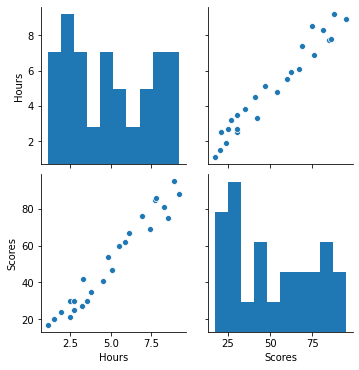

In [16]:
sns.pairplot(dataset)

In [17]:
dataset_corr=dataset.corr()

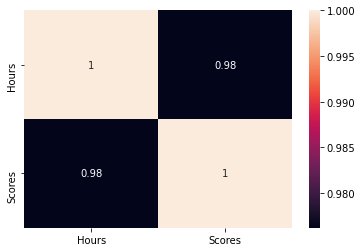

In [18]:
sns.heatmap(dataset_corr,annot=True)

### Plotting the distribution of scores

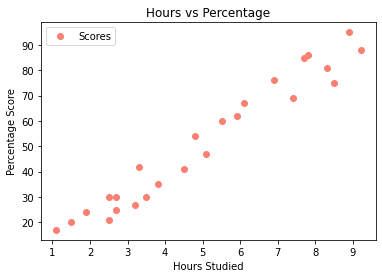

In [19]:
dataset.plot(x='Hours', y='Scores', style='o',c='salmon')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Data Preparation

In [25]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

 ### Importing train_test_split from sklearn and splitting the data


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Training

In [27]:
from sklearn.linear_model import LinearRegression 
linearReg=LinearRegression()
linearReg.fit(X_train,y_train)
print("Completed training")

Completed training


In [29]:
print(linearReg.intercept_)

2.018160041434669


In [31]:
print(linearReg.coef_)

[9.91065648]


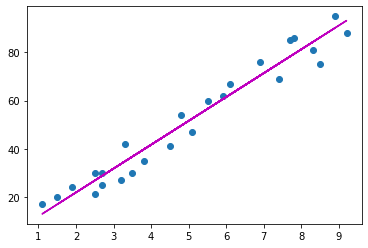

In [36]:
# Plotting the regression line
line = linearReg.coef_*X+linearReg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,c='m');
plt.show()

### Predicting scores based on test hours

In [38]:
y_pred=linearReg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Text(0, 0.5, 'Percentage scored')

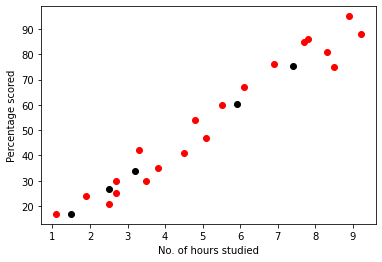

In [40]:
plt.scatter(X_train,y_train,color="red")
plt.scatter(X_test,y_pred,color="black")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

Text(0, 0.5, 'Percentage scored')

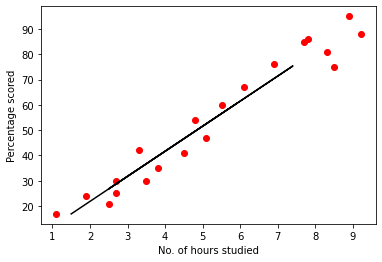

In [41]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_test,y_pred,color="black")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

### Comparing Actual VS Predicted

In [43]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting percentage when hours studied is 9.25

In [45]:
hours = 9.25
own_pred = linearReg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Testing the model with our own data

In [47]:
hours = 8.5
pred = linearReg.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score =",pred[0])

No of Hours = 8.5
Predicted Score = 86.2587401268937


### Evaluating the model 

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368
